## Question 1a.)  

this is the kernel classifier.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

X = np.hstack((np.ones((n,1)), X))  # append a column of ones



def kernel_class():
    sigmas = []
    error_rates = []
    for sigma in np.linspace(0.1, 30, 100):
        sigmas.append(sigma)
        distsq=np.zeros((n,n),dtype=float)
    
        for i in range(0,n):
            for j in range(0,n):
                d = np.linalg.norm(X[i,:]-X[j,:])
                distsq[i,j]=d**2

        K = np.exp(-distsq/(2*sigma**2))

        alpha = np.linalg.inv(K+.5*np.identity(n))@y

        prediction = np.sign(K@alpha)
        #     print("this is y",y)
        #     print("this is the prediction vecotr",prediction)
        error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y,prediction))]

        error_rates.append(str(100*sum(error_vec)/len(error_vec)))
    return(sigmas,error_rates)

## Question 1b.)

we don't achive 0% error but we do get close (about 98%) what I thought was interesting is the error rate seems to increse in increments of sigma values. for example all the sigmas from 2 to 8 have the same error as do 11-15 and 22-27. also there's an odd jump in error when lamba is close to 28 in value.

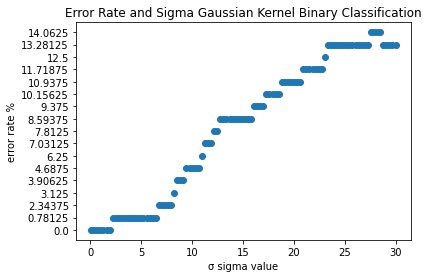

In [4]:
import matplotlib.pyplot as plt


plt.scatter(kernel_class()[0], kernel_class()[1])


plt.title('Error Rate and Sigma Gaussian Kernel Binary Classification')
# plt.legend(loc='lower right')
plt.xlabel('σ sigma value')
plt.ylabel('error rate %')
plt.show()


## Question 1c.) 


In [22]:
def kernel_class_kfold():
    error_rates_per_sig = []
    sigmas = []
    for sigma in np.linspace(0.1, 30, 100):
        sigmas.append(sigma)
        error_rates = []
        for j in range(8):
            
            test_idx = np.arange(j*16,(j+1)*16)
            train_idx = np.setdiff1d(np.arange(128),test_idx)

            X_train, y_train = X[train_idx,:], y[train_idx,:]
            X_test, y_test = X[test_idx,:], y[test_idx,:]

            #creating K and alpha using training data
            train_distsq=np.zeros((X_train.shape[0],X_train.shape[0]),dtype=float)
            
            for i in range(0,112):
                for j in range(0,112):
                    d = np.linalg.norm(X_train[i,:]-X_train[j,:])
                    train_distsq[i,j]=d**2

            K = np.exp(-train_distsq/(2*sigma**2))

            alpha = np.linalg.inv(K+.5*np.identity(112))@y_train
            
            
            #creating a K using the testing data
            test_distsq=np.zeros((X_test.shape[0],X_train.shape[0]),dtype=float)
            
            for i in range(0,16):
                for j in range(0,112):
                    d = np.linalg.norm(X_test[i,:]-X_train[j,:])
                    test_distsq[i,j]=d**2
            K_test = np.exp(-test_distsq/(2*sigma**2))
            
            
            # measuring the accuracy of our model using K_test and alpha
            prediction = np.sign(K_test@alpha)
            
            #for a given sigma value and data set, it compares the 16points in the test_y to the actual value. 
            #if they match we get a 1 and if they don't we get a zero 
            #(in total you have 8 error vectors that have len 16 for every sigma)
            error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test,prediction))]
#             print("this is the error_vector",error_vec)
            
    
            #the average number of error per data set given a sigma value (1 by 8) 
            #there is an error_vec for every sigma
            error_rates.append((100*sum(error_vec)/len(error_vec)))
#         print("error rates mean",error_rates)
        
        
        # getting the average number of errors across the 8 data sets given a sigma 
        error_rates_per_sig.append(np.mean(error_rates))
    
    
    
    
    return sigmas,error_rates_per_sig




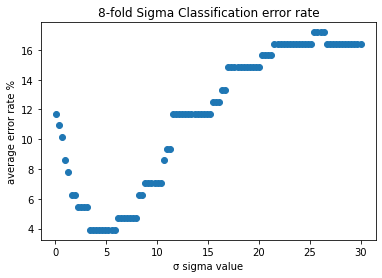

In [23]:
import matplotlib.pyplot as plt


plt.scatter(kernel_class_kfold()[0], kernel_class_kfold()[1])


plt.title('8-fold Sigma Classification error rate')
# plt.legend(loc='lower right')
plt.xlabel('σ sigma value')
plt.ylabel('average error rate %')
plt.show()
